In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import copy

alpha = 10e-2

class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def reset(self):
        self.x = 0
        self.y = 0
        
    def shift_ex1(self,p):
        self.x = (1 - alpha) * self.x + alpha * p.x
        self.y = (1 - alpha) * self.y + alpha * p.y
        
    def shift_ex2(self,r,p):
        self.x = self.x + (p.x-r.x)
        self.y = self.y + (p.y-r.y)
        
    def shift_ex2_after_for(self,d):
        self.x = self.x + (alpha/1000) * d.x
        self.y = self.y + (alpha/1000) * d.y
    
    def __repr__(self):
        point = 'Point(' + str(self.x) + ',' + str(self.y) + ')'
        return point

def distance(p1 ,p2):
        dx = p1.x - p2.x
        dy = p1.y - p2.y
        return math.hypot(dx, dy)    

def average_of_2_points(p1,p2):
    avg   = Point(0,0)
    avg.x = (p1.x+p2.x)/2
    avg.y = (p1.y+p2.y)/2
    return avg

def closest_pair_of_points(data):
    min_distance = float('inf')
    size = len(data)
    for i in range(size):
        for j in range(size):
            if(j == i):
                continue
            if distance(data[i],data[j]) < min_distance:
                min_distance = distance(data[i],data[j])
                points = [data[i],data[j]]
    return points

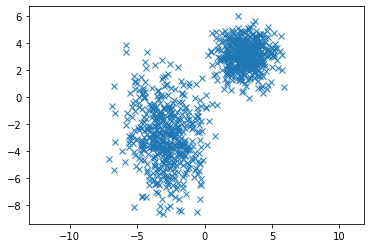

In [30]:
random.seed(1)
mean=[3,3]
cov=[[1,0],[0,1]]
a=np.random.multivariate_normal(mean,cov,500).T

mean=[-3,-3]
cov=[[2,0],[0,5]]
b=np.random.multivariate_normal(mean,cov,500).T

c=np.concatenate((a,b),axis=1)
c=c.T
np.random.shuffle(c)
c=c.T

x = c[0]
y = c[1]

plt.plot(x,y,'x')
plt.axis('equal')
plt.show()

dataset  = []
dataset1 = []
dataset2 = []

for p in c.T:
    new_point = Point(p[0],p[1])
    dataset.append(new_point)
    
for p in a.T:
    new_point = Point(p[0],p[1])
    dataset1.append(new_point)
    
for p in b.T:
    new_point = Point(p[0],p[1])
    dataset2.append(new_point)

# Ex 1

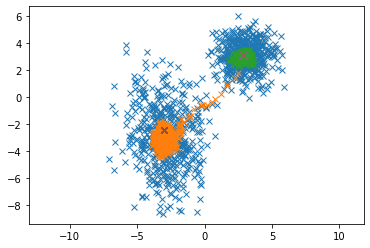

In [31]:
random.seed(3)
indx1 = random.choice(range(1000))   
indx2 = random.choice(range(1000))   

r1 = Point(x[indx1],y[indx1])
r2 = Point(x[indx2],y[indx2])

r1_1st_passage = []
r2_1st_passage = []

r1_end_passage=[]
r2_end_passage=[]

for i in range(10):
    for p in dataset:
        if distance(r1,p) < distance(r2,p):
            r1.shift_ex1(p)
            if(i == 0):
                r1_1st_passage.append([r1.x,r1.y])
        else:
            r2.shift_ex1(p)
            if(i == 0):
                r2_1st_passage.append([r2.x,r2.y])
    
    r1_end_passage.append([r1.x,r1.y])
    r2_end_passage.append([r2.x,r2.y])


r1_1st_passage = np.transpose(r1_1st_passage)
r2_1st_passage = np.transpose(r2_1st_passage)

r1_end_passage = np.transpose(r1_end_passage)
r2_end_passage = np.transpose(r2_end_passage)    
    
plt.plot(x,y,'x')
plt.plot(r1_1st_passage[0],r1_1st_passage[1], 'x')
plt.plot(r2_1st_passage[0],r2_1st_passage[1], 'x')

plt.plot(r1_end_passage[0],r1_end_passage[1], 'x')
plt.plot(r2_end_passage[0],r2_end_passage[1], 'x')
plt.plot([r1.x,r2.x],[r1.y,r2.y], 'x')

plt.axis('equal')
plt.show() 

- Os random points gerados tendem em convergir para o centro dos datasets gerados inicialmente (label1 e label2), cujo os centros são respetivamente (3,3) e (-3,-3).

# Ex 2

## a)

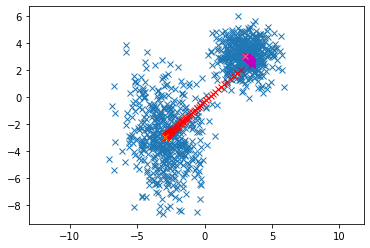

Point(-2.9523734007768265,-2.9807091335983626) Point(2.974239132671934,3.080330812494743)


In [32]:
r1 = Point(x[indx1],y[indx1])
r2 = Point(x[indx2],y[indx2])

d1 = Point(0,0)
d2 = Point(0,0)

r1_end_passage=[]
r2_end_passage=[]

prev_r1_x = 0
prev_r1_y = 0
prev_r2_x = 0
prev_r2_y = 0

while (prev_r1_x != r1.x and prev_r1_y != r1.y) or (prev_r2_x != r2.x and prev_r2_y != r2.y):
    prev_r1_x = r1.x
    prev_r1_y = r1.y
    prev_r2_x = r2.x
    prev_r2_y = r2.y

    d1.reset()
    d2.reset()
    
    for p in dataset:
        if distance(r1,p) < distance(r2,p):
            d1.shift_ex2(r1,p)
        else:
            d2.shift_ex2(r2,p)
    
    r1.shift_ex2_after_for(d1)
    r2.shift_ex2_after_for(d2)
    
    r1_end_passage.append([r1.x,r1.y])
    r2_end_passage.append([r2.x,r2.y])

r1_end_passage = np.transpose(r1_end_passage)
r2_end_passage = np.transpose(r2_end_passage)   

plt.plot(x,y,'x')

plt.plot(r1_end_passage[0],r1_end_passage[1], 'x', color = 'r')
plt.plot(r2_end_passage[0],r2_end_passage[1], 'x', color = 'm')

plt.plot([r1.x,r2.x],[r1.y,r2.y], 'x')

plt.axis('equal')
plt.show() 

print(r1,r2)

- Podemos observar que os random points gerados vão pelo caminho mais curto até ao centro do datasets. 

## b)

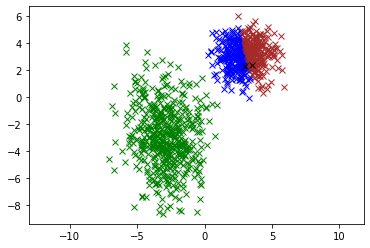

In [33]:
r1 = Point(x[indx1],y[indx1])
r2 = Point(x[indx2],y[indx2])

d1 = Point(0,0)
d2 = Point(0,0)

color1_x = []
color1_y = []
color2_x = []
color2_y = []
color3_x = []
color3_y = []
color4_x = []
color4_y = []

for p in dataset:
    if distance(r1,p) < distance(r2,p):
        if(p.x in a[0] and p.y in a[1]):
            color1_x.append(p.x)
            color1_y.append(p.y)
        else:
            color3_x.append(p.x)
            color3_y.append(p.y)
    else:
        if(p.x in b[0] and p.y in b[1]):
            color2_x.append(p.x)
            color2_y.append(p.y)
        else:
            color4_x.append(p.x)
            color4_y.append(p.y)

plt.plot(color1_x,color1_y, 'x', color = "blue")
plt.plot(color2_x,color2_y, 'x', color = "red")
plt.plot(color3_x,color3_y, 'x', color = "green")
plt.plot(color4_x,color4_y, 'x', color = "brown")
plt.plot([r1.x,r2.x],[r1.y,r2.y], 'x', color = "k")

plt.axis('equal')
plt.show() 

- Consoante a proximidade dos pontos ao r1 e r2 e se pertencem ao label 1 ou 2, foi gerado 4 clusters com 4 cores distintas, nesta caso podemos observar que apenas foram gerados 3 clusters, em que o label 2 foi considerado um cluster e que o label 1 foi dividido em 2 consoante a proximidade ao r1 r2, e consequentemente o label 1 foi dividido em 2 cores distintas.

## c)

Point(3.0315623854179874,2.288498636794772) Point(3.53330858617636,2.4015118359373604)
0


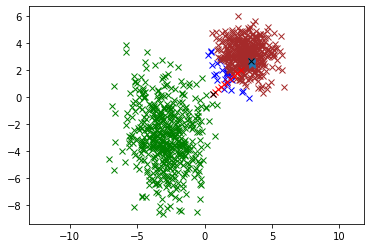

10


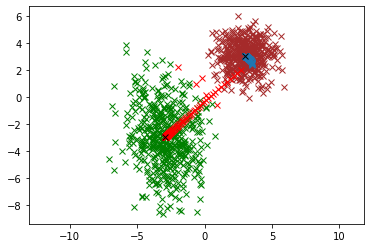

20


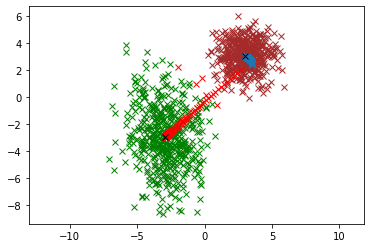

29


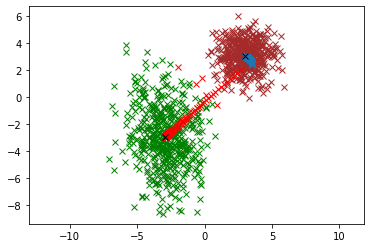

In [34]:
r1 = Point(x[indx1],y[indx1])
r2 = Point(x[indx2],y[indx2])
print(r1,r2)
d1 = Point(0,0)
d2 = Point(0,0)

r1_end_passage=[]
r2_end_passage=[]

for i in range(30):
    color1_x = []
    color1_y = []
    color2_x = []
    color2_y = []
    color3_x = []
    color3_y = []
    color4_x = []
    color4_y = []
    
    prev_r1_x = 0
    prev_r1_y = 0
    prev_r2_x = 0
    prev_r2_y = 0

    for l in range(10):
        d1.reset()
        d2.reset()
        
        prev_r1_x = r1.x
        prev_r1_y = r1.y
        prev_r2_x = r2.x
        prev_r2_y = r2.y

        for p in dataset:
            if distance(r1,p) < distance(r2,p):
                d1.shift_ex2(r1,p)

                if l == 9:
                    if(p.x in a[0] and p.y in a[1]):
                        color1_x.append(p.x)
                        color1_y.append(p.y)
                    else:
                        color3_x.append(p.x)
                        color3_y.append(p.y)
            else:
                d2.shift_ex2(r2,p)

                if l == 9:
                    if(p.x in b[0] and p.y in b[1]):
                        color2_x.append(p.x)
                        color2_y.append(p.y)
                    else:
                        color4_x.append(p.x)
                        color4_y.append(p.y)

        r1.shift_ex2_after_for(d1)
        r2.shift_ex2_after_for(d2)

        r1_end_passage.append([r1.x,r1.y])
        r2_end_passage.append([r2.x,r2.y])

    if i%10 == 0 or i==29:
        print(i)
        r1_end_passage = np.transpose(r1_end_passage)
        r2_end_passage = np.transpose(r2_end_passage)
        
        plt.plot(color1_x,color1_y, 'x', color = "blue")
        plt.plot(color2_x,color2_y, 'x', color = "red")
        plt.plot(color3_x,color3_y, 'x', color = "green")
        plt.plot(color4_x,color4_y, 'x', color = "brown")

        plt.plot(r1_end_passage[0],r1_end_passage[1], 'x', color = 'r')
        plt.plot(r2_end_passage[0],r2_end_passage[1], 'x',)

        plt.plot([r1.x,r2.x],[r1.y,r2.y], 'x', color = "k")

        plt.axis('equal')
        plt.show()
        
        r1_end_passage = np.transpose(r1_end_passage).tolist()
        r2_end_passage = np.transpose(r2_end_passage).tolist()


# Ex 3 - Brute Force

Point(-4.517440303125376,-4.966789867448556) Point(-1.2303486508094827,1.9162685674016453)


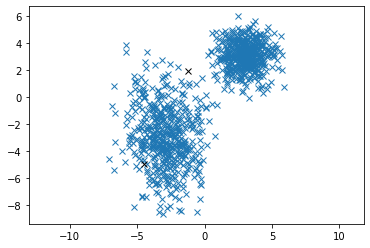

In [35]:
aux_dataset = copy.deepcopy(dataset)

while len(aux_dataset) > 2:
    points = closest_pair_of_points(aux_dataset)
    
    aux_dataset.remove(points[0])
    aux_dataset.remove(points[1])
    aux_dataset.append(average_of_2_points(points[0],points[1]))
    
print(aux_dataset[0],aux_dataset[1])

plt.plot(x,y,'x')
plt.plot([aux_dataset[0].x,aux_dataset[1].x],[aux_dataset[0].y,aux_dataset[1].y] , 'x' , color = 'k')
plt.axis('equal')
plt.show() 

# Ex 4

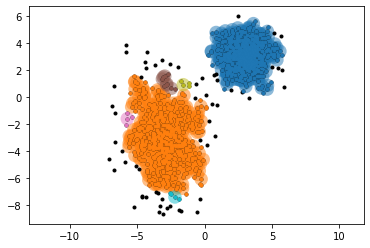

In [36]:
epsilon    = 0.5
min_points = 4

verified_points = []

fig, ax = plt.subplots()
plt.plot(x,y,'.' , color = 'k') #dataset inicial

while len(verified_points) != len(dataset):
    
    color = next(ax._get_lines.prop_cycler)['color']
    r = random.choice([x for x in dataset if x not in verified_points])
    
    cluster = []
    starting_points = [r]
    
    for starting_point in starting_points:
        core_points = [starting_point]
        
        if starting_point in verified_points:
            continue
        else:
            verified_points = np.append(verified_points,starting_point)
        
        for p in dataset:
            if distance(p , starting_point) <= epsilon and (p.x != starting_point.x and p.y != starting_point.y):
                core_points = np.append(core_points,p)
        
        if len(core_points) >= min_points:
            for core_point in core_points:
                if core_point not in starting_points:
                    starting_points.append(core_point)
                    plt.plot(core_point.x,core_point.y, '.', color = color)
            if starting_point == starting_points[0]:
                plt.plot(starting_point.x,starting_point.y, '.', color = color)
                
            circle = plt.Circle((core_points[0].x,core_points[0].y),epsilon, color = color , alpha = 0.5, lw = 0)
            ax.add_artist(circle)
                    
        else:
            continue

plt.axis('equal')
plt.show()   